# **Chapter 2 Visulaizaion**
## **Word Cloud - 말뭉치 응용**

In [0]:
! apt-get update
! apt-get install g++ openjdk-8-jdk 
! pip3  install  nltk konlpy wordcloud matplotlib gensim 

! apt-get install fonts-nanum*
! apt-get install fontconfig
! fc-cache -fv
! cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /content/.cache/matplotlib/*

speech_text = "https://raw.githubusercontent.com/YongBeomKim/nltk_rnd/master/data/pyongyang_fin.txt"
font_file   = "/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding.ttf"
# speech_text = "../data/pyongyang_fin.txt"
# font_file   = "../data/D2Coding.ttf"

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [6,819 B]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Hit:12 http://archive.ubuntu.com/ubuntu bionic InRelea

In [0]:
import nltk
nltk.download('punkt')

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# for Colab
import requests
texts = requests.get(speech_text).text
texts[:100]

# for LocalHost
# with open(speech_text, 'r') as f:
#     texts = f.read()
# texts[:100]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

(-0.5, 399.5, 199.5, -0.5)

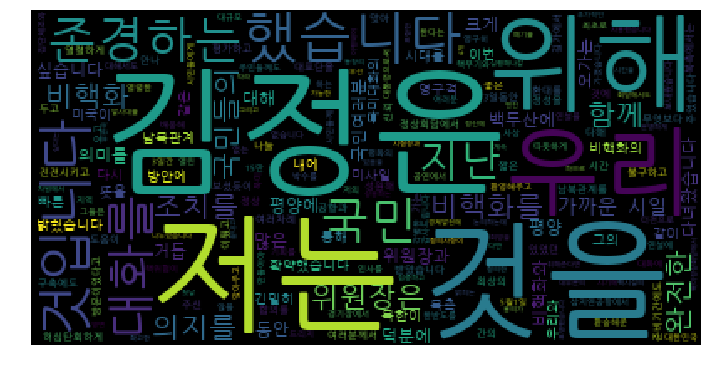

In [0]:
%matplotlib inline
wcloud = WordCloud(font_file).generate(texts)
plt.figure(figsize=(12,12))
plt.imshow(wcloud)
plt.axis("off")

In [0]:
from collections import Counter
dictionary = Counter(texts.split())
dictionary.most_common()[:10]

[('김정은', 7),
 ('저는', 6),
 ('것을', 6),
 ('수', 5),
 ('위해', 5),
 ('우리', 4),
 ('것입니다.', 4),
 ('존경하는', 3),
 ('국민', 3),
 ('대화를', 3)]

<br/>
## **명사만 추출하여 Wordcloud 만들기**

In [0]:
texts[:200]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은 위원장과 여러차례 만나 긴 시간 많은 대화를 허심탄회하게 나눌 수 있었던 것에 큰 의미를 두고 싶습니다.\n\n남북관계를 크게 진전시키고 두 정상 간의 신뢰 구축에도 큰 도움이 된 '

In [0]:
# Twitter 모듈을 활용하여 명사만 추출
from konlpy.tag import Okt 
twitter     = Okt()
tokens      = twitter.pos(texts, stem=True)
tokens_noun = [token[0]   for token in tokens  
                          if token[1] == "Noun"]

texts_noun  = " ".join(tokens_noun)
texts_noun[:300]

'존경 국민 여러분 성원 주신 덕분 평양 국민 여러분 정상회담 합의 최상 환대 무엇 김정은 위원장 차례 시간 대화 허심 탄회 수 것 의미 남북관계 크게 진전 두 정상 간의 신뢰 구축 도움 방문 평가 북 준비 기간 불구 우리 대표 단 정성 다해 동안 공항 길가 환영 환송 평양 시민 각별 인사 수 백두산 동안 삼지연공항 배웅 준 지역 주민 감사 저 경기장 대규모 집단체조 공연 평양 시민 대한민국 대통령 사상 최초 연설 기회 그 한반도 영구 핵무기 핵 위협 평화 터전 저 연설 대해 박수 보 존경 국민 여러분 지난 저 김정은 위원장 비핵화 '

(-0.5, 399.5, 199.5, -0.5)

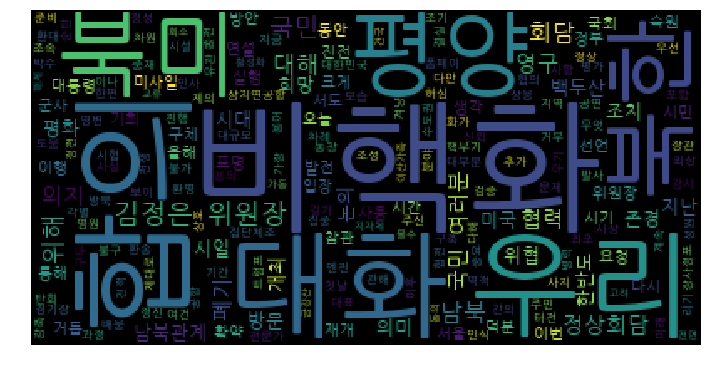

In [0]:
%matplotlib inline
plt.figure(figsize=(12,12))
wcloud = WordCloud(font_file).generate(texts_noun)
plt.imshow(wcloud)
plt.axis("off")

In [0]:
# Token 빈도결과값
from collections import Counter
dictionary = Counter(texts_noun.split())
dictionary.most_common()[:10]

[('것', 14),
 ('국민', 10),
 ('비핵화', 10),
 ('위원장', 9),
 ('합의', 8),
 ('대화', 8),
 ('우리', 8),
 ('저', 8),
 ('평양', 7),
 ('김정은', 7)]